In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df = pd.read_excel("treeleaf.xlsx")
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [84]:
# df.tail()

# Data Cleaning And Exploratory Data Analysis

In [85]:
df.shape

(5000, 16)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [87]:
df.duplicated().sum()

0

In [88]:
df.isnull().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [89]:
df.isnull().sum()/len(df) * 100     #percentage of missiong values

ID                     0.00
Age                    0.00
Gender                31.92
Experience             0.00
Income                 1.34
ZIP Code               0.00
Family                 0.00
CCAvg                  0.00
Education              0.00
Mortgage               0.00
Home Ownership        23.78
Personal Loan          0.00
Securities Account     0.00
CD Account             0.00
Online                 0.80
CreditCard             0.00
dtype: float64

- Gender, Income, home ownership and Online are having some amount of missing values

In [90]:
target = df[['Personal Loan']]
target.value_counts()

Personal Loan
0                4520
1                 479
                    1
Name: count, dtype: int64

In [91]:
index_of_value = df[df['Personal Loan'] == ' '].index
df.drop(index_of_value, inplace=True)

- The dataset is highly imbalanced as well

In [92]:
# lets seperate the dataset into numeric and categorical features for further analysis
cat_data = [x for x in df.columns if df[x].dtype == 'O']
num_data = [x for x in df.columns if x not in cat_data]

In [93]:
print("The categorical features are \n", cat_data, end='\n')
print("-----------------------------------------------")
print("The numerical features are \n", num_data, end='\n')

The categorical features are 
 ['Gender', 'Home Ownership', 'Personal Loan']
-----------------------------------------------
The numerical features are 
 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


# EDA on Numerical Columns

Before performing EDA we need to handle missing values to ensure analysis and modeling are based on a complete and accurate dataset.

In [94]:
df.isnull().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [95]:
df['Gender'].fillna('Missing', inplace=True) #filling missing values by replacing NaN with "Missing", creating another category

In [96]:
df['Gender'].value_counts()

Gender
M          1676
F          1607
Missing    1596
O            96
-            21
#             3
Name: count, dtype: int64

In [97]:
df['Home Ownership'].fillna('missed', inplace=True) 

In [98]:
df['Home Ownership'].value_counts()

Home Ownership
Home Mortage    1704
missed          1189
Home Owner      1156
Rent             950
Name: count, dtype: int64

In [99]:
# filling the missing values in Income column
df['Income'].describe() 

count    4932.000000
mean       72.746148
std        45.422289
min         8.000000
25%        39.000000
50%        63.000000
75%        95.000000
max       224.000000
Name: Income, dtype: float64

In [100]:
df['Income'].replace(np.NaN, df['Income'].median(), inplace=True)  #replacing the nan values with the median of the distribution

In [101]:
df['Income'].isnull().sum()

0

In [102]:
df.dropna(inplace=True) # Ramining missing values from Online feature are removed

In [103]:
df.shape

(4959, 16)

In [104]:
df.isnull().sum()

ID                    0
Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

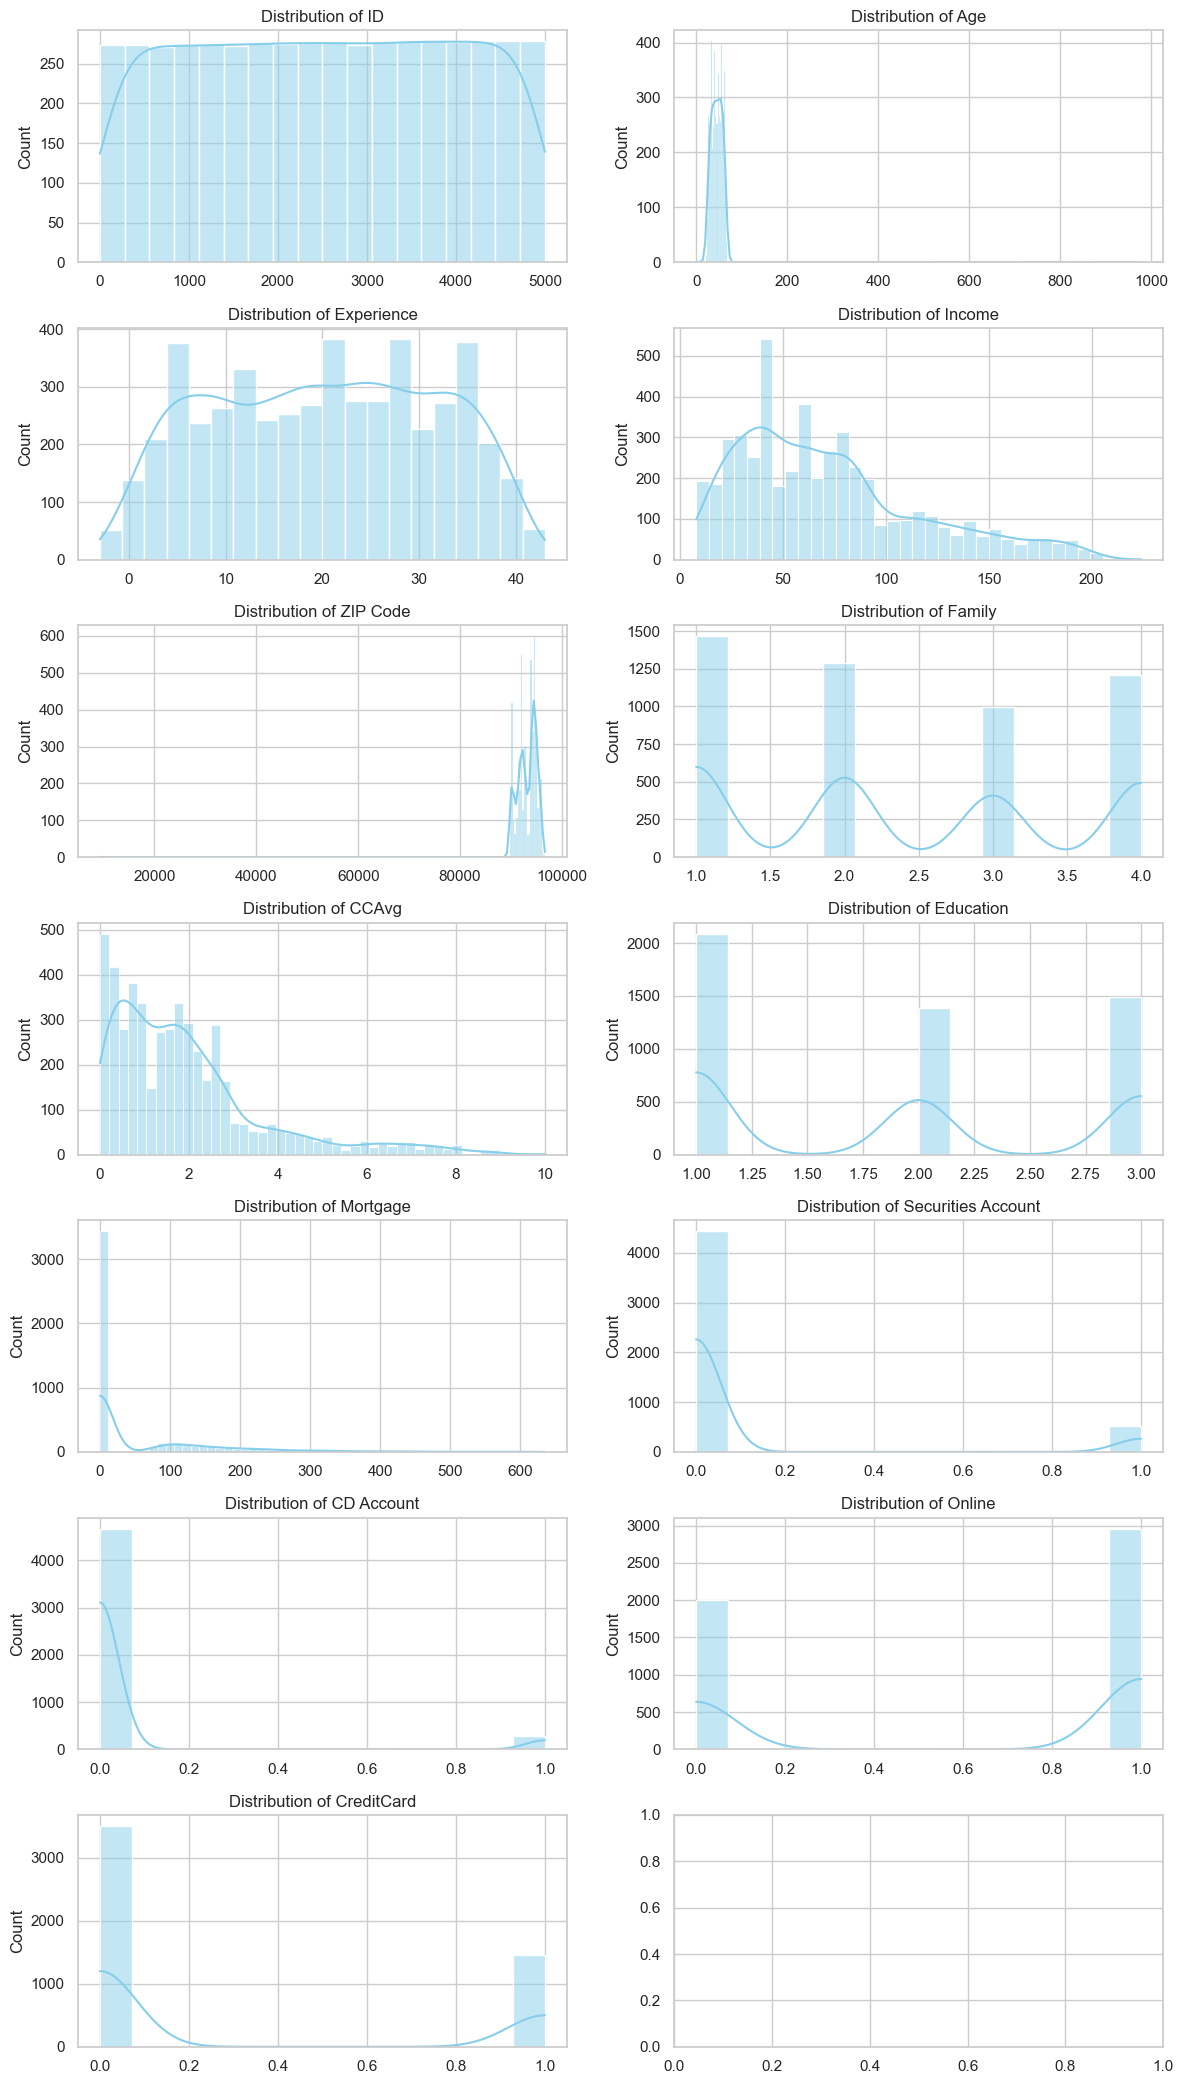

In [105]:
num_cols = 13
num_rows = (len(num_data) + 1) // 2
num_cols_subplot = 2 if num_cols > 1 else 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_subplot, figsize=(12, 3 * num_rows))
axes = axes.flatten()
for i, col in enumerate(df[num_data].columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

- It seems that some of the features (family, education, creditcard, cd account, online and securities account) are having discrete data in them.
- Experience, Income, Age, CCAvg and Mortgage have continuous data.

In [106]:
df[num_data].describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000,4959.000000
mean,2510.182698,46.027223,20.107078,72.103045,93148.218189,2.392216,1.923654,1.878403,56.209316,0.104860,0.058480,0.596895,0.294011
std,1443.128307,25.517900,11.459244,44.837307,2123.257917,1.147295,1.735744,0.840398,101.151677,0.306404,0.234672,0.490571,0.455643
min,1.000000,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1262.500000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2515.000000,45.000000,20.000000,63.000000,93407.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3760.500000,55.000000,30.000000,93.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


- The amount of experience cannot be a negative value, and what we can see from above is it has a min value of -3 which is clearly an outlier.
- The age of any person can't be 978 which is also a sign that there are some outliers in age column.

In [107]:
num_data.append('Personal Loan')

In [116]:
df[num_data].corr()['Personal Loan']

ID                   -0.004409
Age                   0.082996
Experience           -0.007063
Income                0.419815
ZIP Code             -0.006364
Family                0.052487
CCAvg                 0.359913
Education             0.134646
Mortgage              0.140224
Securities Account    0.027728
CD Account            0.309581
Online                0.007183
CreditCard            0.003006
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

Some features are very less correlated with the target feature

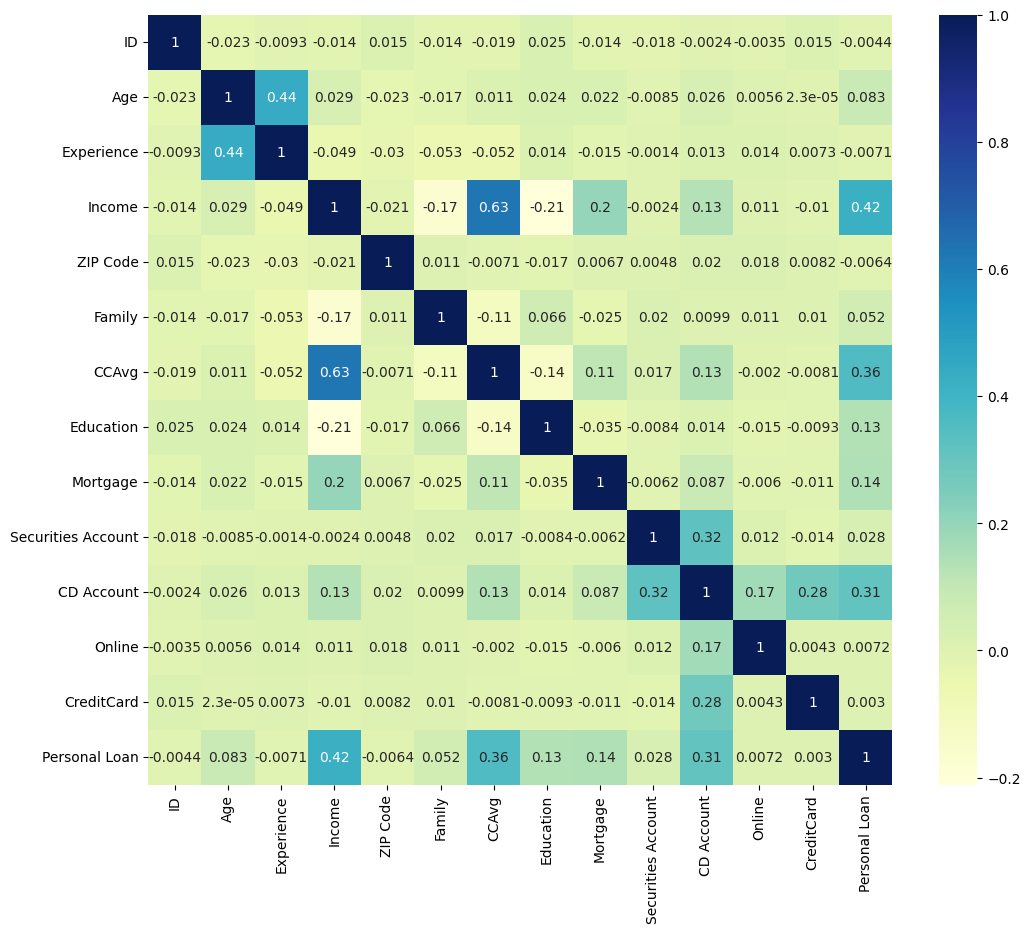

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_data].corr(), cmap="YlGnBu", annot=True)
plt.show()

- clearly the income, CCAvg and CD account are more related to the target feature than that of other independent features.
- The CCAvg and Income feature are also highly correlated with each other.

In [28]:
#plotting box plot to check if outlier are present in continuous feature or not
cont_data = df[["Experience", "Income", "Age", "CCAvg", "Mortgage"]]
cont_data.head()

,Experience,Income,Age,CCAvg,Mortgage
0,1,49.0,25,1.6,0
1,19,34.0,45,1.5,0
2,15,11.0,39,1.0,0
3,9,100.0,35,2.7,0
4,8,45.0,35,1.0,0


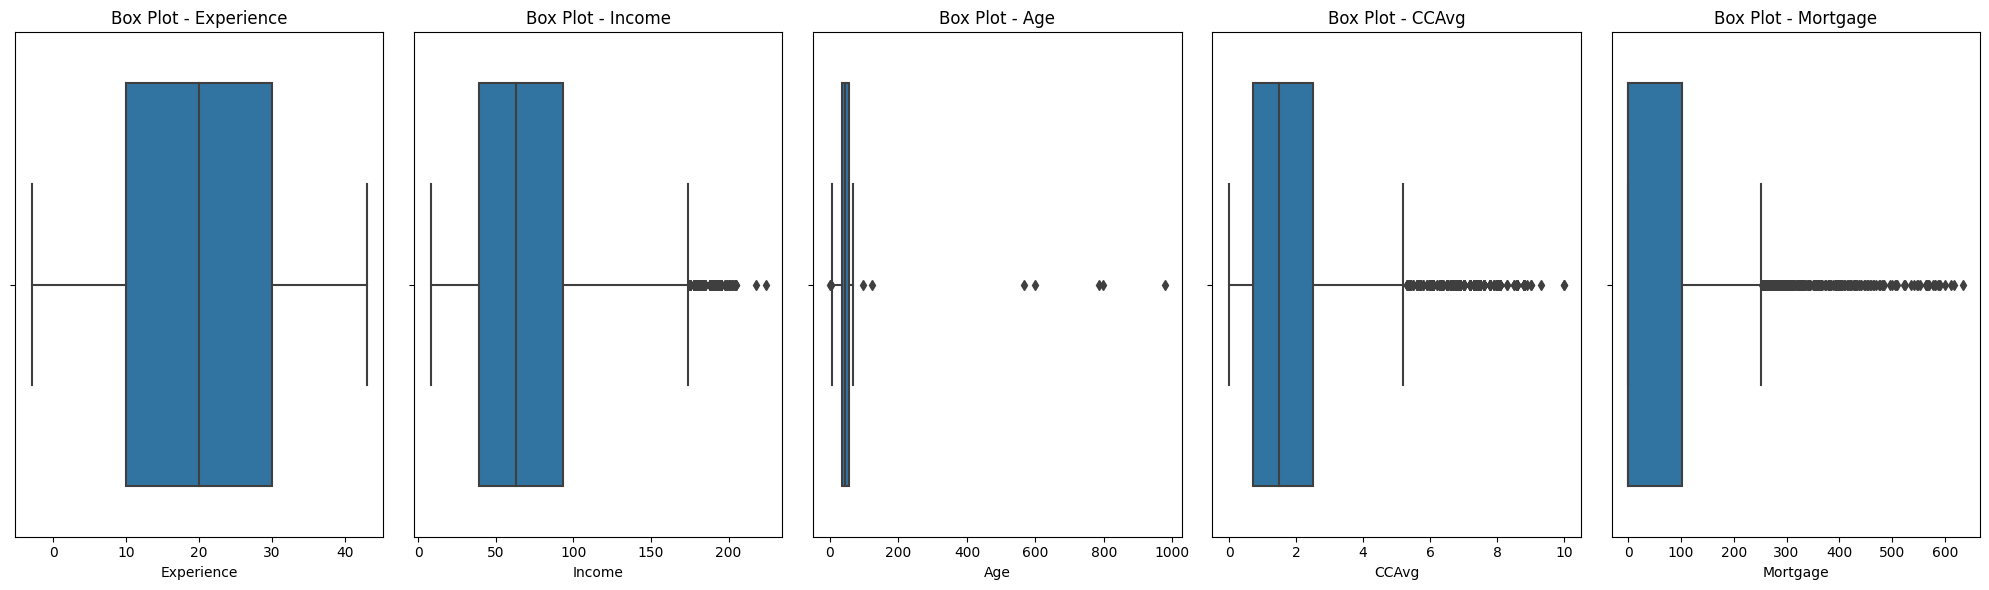

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=len(cont_data.columns), figsize=(20, 6))
for i, feature in enumerate(cont_data):
    sns.boxplot(x=df[feature], ax=axes[i], orient='h')
    axes[i].set_title(f'Box Plot - {feature}')

plt.tight_layout()
plt.show()

- Age column has relatively more no. of outliers

## Key Findings
- The distribution of Income and CCAvg are a bit right skewed.
- Experience and Age columns have outliers in them.
- Income, CCAvg and CD account are more related to the target feature than that of other independent features.
- The CCAvg and Income feature are also highly correlated with each other.


# EDA on Categorical data

In [30]:
cat_data

['Gender', 'Home Ownership', 'Personal Loan']

In [31]:
df['Gender'].value_counts()

Gender
M          1654
Missing    1596
F          1589
O            96
-            21
#             3
Name: count, dtype: int64

In [32]:
hypen = df['Gender'] == '-'
hasht = df['Gender'] == '#'

In [33]:
df = df.drop(df[hypen].index)
df = df.drop(df[hasht].index)

C:\Users\user1\AppData\Local\Temp\ipykernel_4064\800590120.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[hasht].index)


<Axes: xlabel='Gender', ylabel='count'>

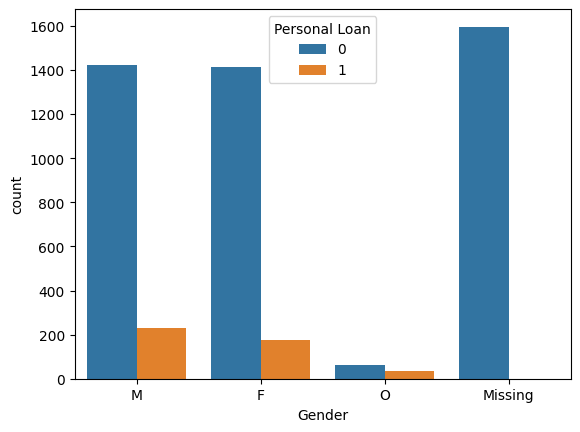

In [34]:
sns.countplot(x ='Gender', hue = "Personal Loan", data = df)

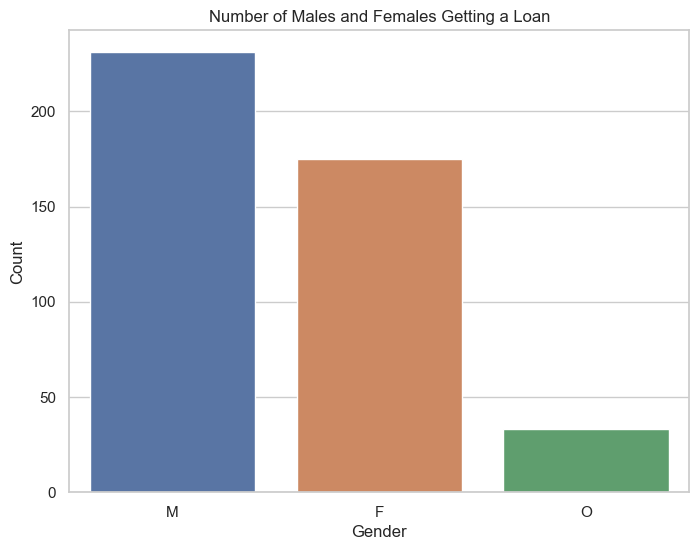

In [35]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
loan_applicants = df[df['Personal Loan'] == 1]
sns.countplot(x="Gender", data=loan_applicants)
plt.title("Number of Males and Females Getting a Loan")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [36]:
df['Home Ownership'].value_counts()

Home Ownership
Home Mortage    1689
missed          1189
Home Owner      1130
Rent             927
Name: count, dtype: int64

<Axes: xlabel='Home Ownership', ylabel='count'>

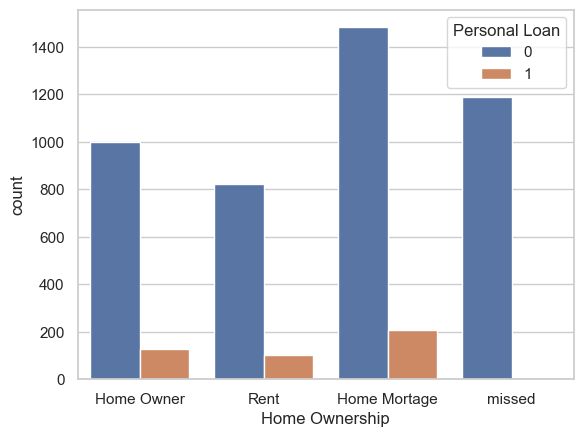

In [37]:
sns.countplot(x ='Home Ownership', hue = "Personal Loan", data = df)

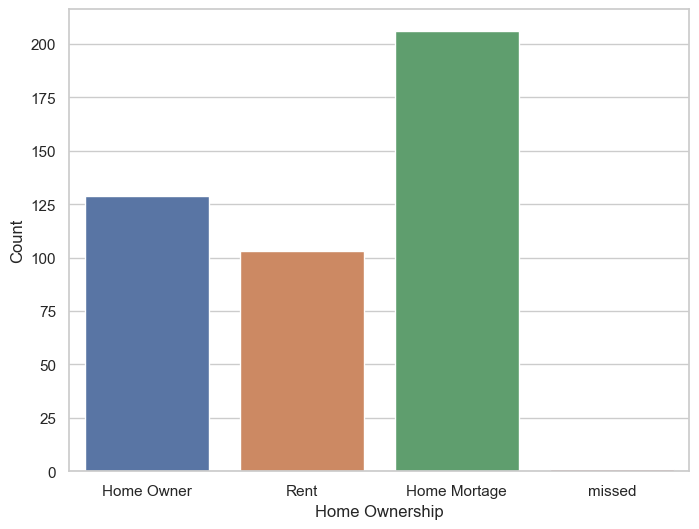

In [38]:
plt.figure(figsize=(8, 6))
loan_applicants = df[df['Personal Loan'] == 1]
sns.countplot(x="Home Ownership", data=loan_applicants)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()

In [39]:
df.columns

Index(['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Home Ownership', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [40]:
discrete_data = df[['Family', 'Education', 'Securities Account', 'CD Account', 'CreditCard']]
discrete_data.head()

,Family,Education,Securities Account,CD Account,CreditCard
0,4,1,1,0,0
1,3,1,1,0,0
2,1,1,0,0,0
3,1,2,0,0,0
4,4,2,0,0,1


C:\Users\user1\AppData\Local\Temp\ipykernel_4064\750178857.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


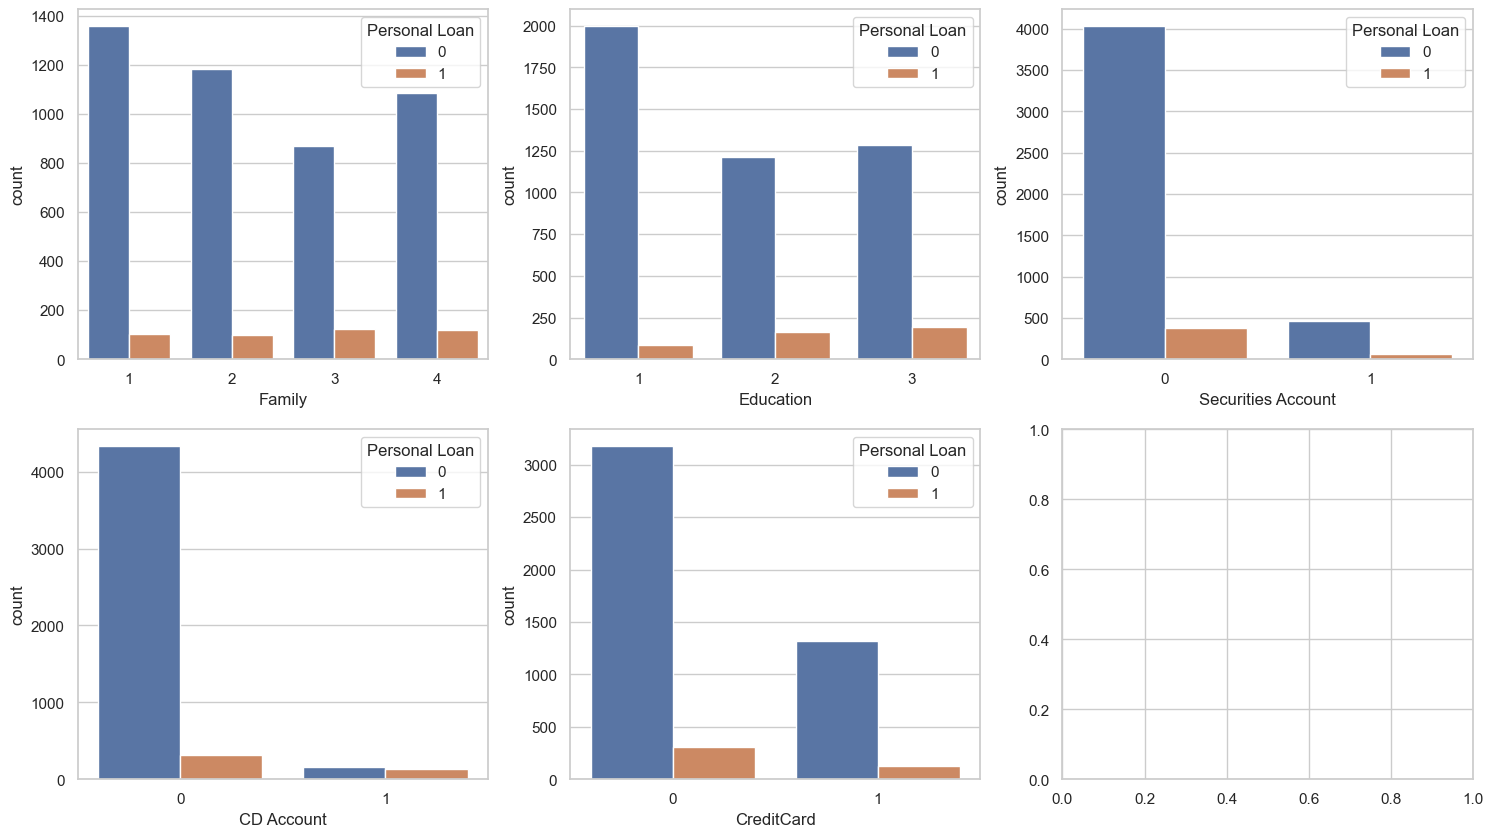

In [41]:
fig, ax =plt.subplots(2,3, figsize = (18,10))
sns.countplot(x ='Family', hue = "Personal Loan", data = df, ax = ax[0,0])
sns.countplot(x ='Education', hue = "Personal Loan", data = df, ax = ax[0,1])
sns.countplot(x ='Securities Account', hue = "Personal Loan", data = df, ax = ax[0,2])
sns.countplot(x ='CD Account', hue = "Personal Loan", data = df, ax = ax[1,0])
sns.countplot(x ='CreditCard', hue = "Personal Loan", data = df, ax = ax[1,1])
fig.show()

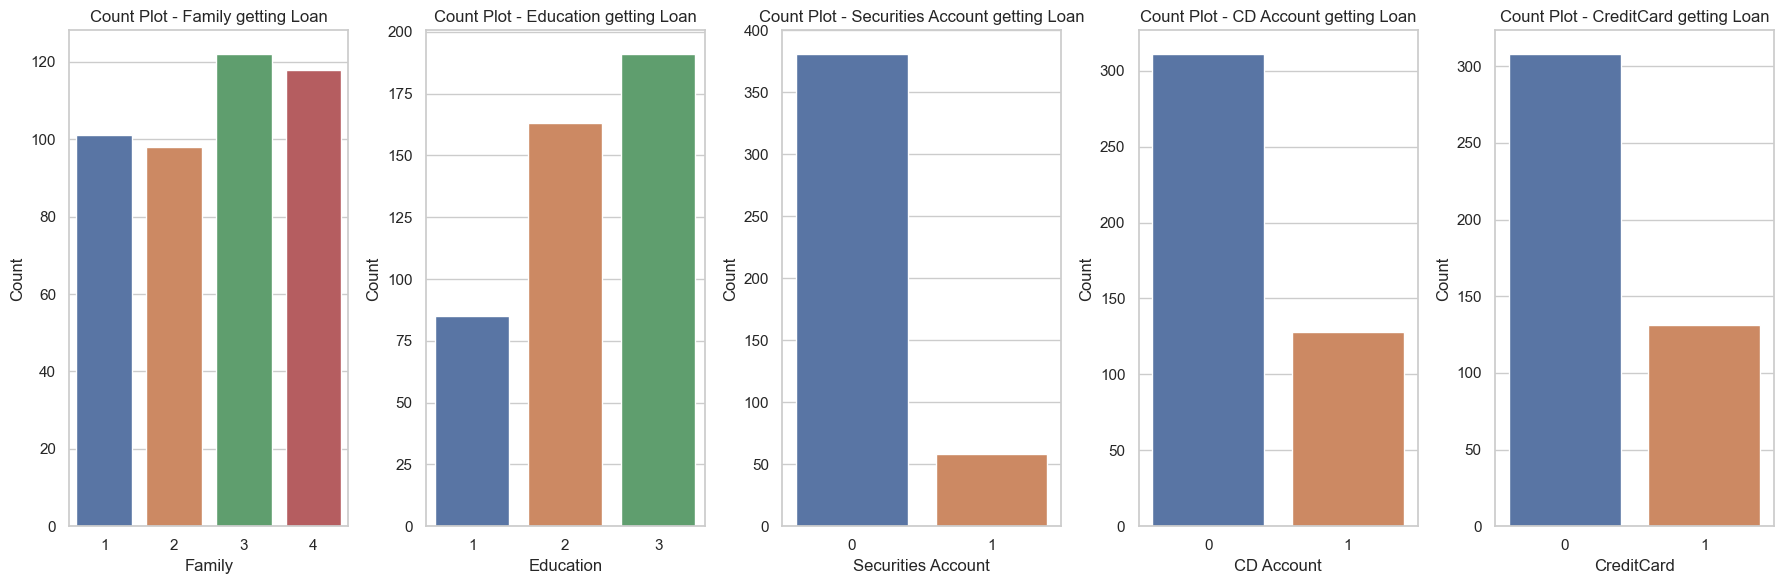

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))
for i, feature in enumerate(discrete_data.columns):
    sns.countplot(x=feature, data=df[df['Personal Loan'] == 1], ax=axes[i])
    axes[i].set_title(f'Count Plot - {feature} getting Loan')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
plt.tight_layout()

# Show the plots
plt.show()


# Key findings
- Gender column has 2 unknown classes other than M,F and O
- No. of males getting personal loan is higher in compare to others.
- People having Home Mortgage have more chance in getting personal loan than Home Owner or Rent.
- From the above plot we can say people having 3-4 family members are more likely to get personal loan, similarly people having bachelor or masters degree are more likely to get loan and so on.

# Feature Engineering

C:\Users\user1\AppData\Local\Temp\ipykernel_4064\2939543063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\user1\AppData\Local\Temp\ipykernel_4064\2939543063.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'])


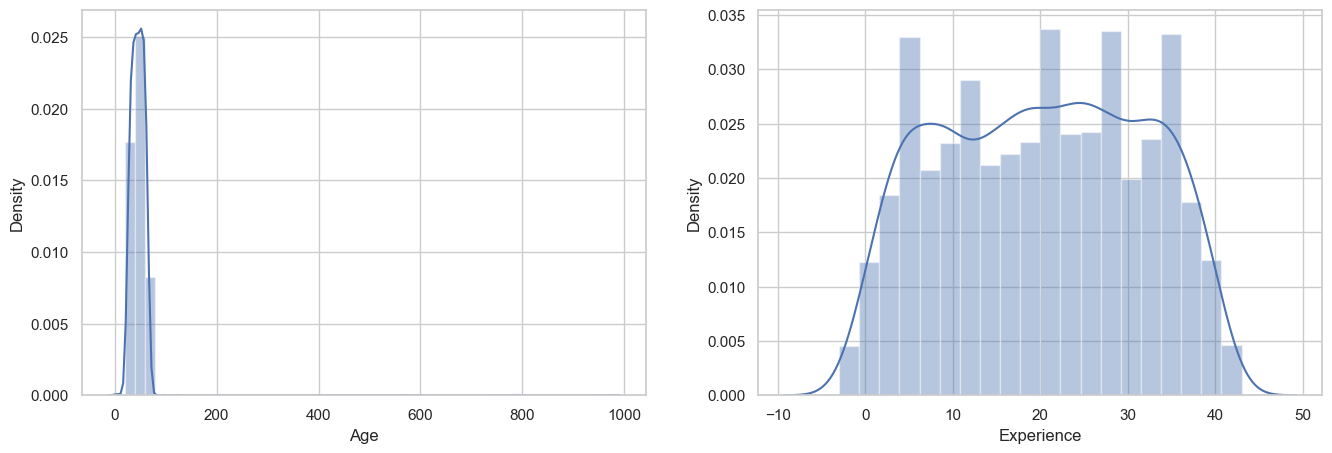

In [43]:
# Handling outliers
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
sns.distplot(df['Experience'])

plt.show()

In [44]:
print("Mean value of Age", df['Age'].mean())
print("std value of Age", df['Age'].std())
print("min value of Age", df['Age'].min())
print("max value of Age", df['Age'].max())

Mean value of Age 46.03910840932117
std value of Age 25.569228742126086
min value of Age 0
max value of Age 978


In [45]:
print("highest allowed", df['Age'].mean() + 3*df['Age'].std())
print("lowest allowed", df['Age'].mean() - 3*df['Age'].std())

highest allowed 122.74679463569943
lowest allowed -30.668577817057084


In [46]:
upperlimit_for_age = df['Age'].mean() + 3*df['Age'].std()
lowerlimit_for_age = 0

In [47]:
# replacing the outliers in Age column using Caping method
df['Age'] = np.where(
            df['Age'] > upperlimit_for_age,
            upperlimit_for_age,
            np.where(
            df['Age'] < lowerlimit_for_age,
            lowerlimit_for_age,
            df['Age']
            )
)

In [48]:
# df[df['Age'] < df['Experience']]

In [49]:
print("Mean value of Experience", df['Experience'].mean())
print("std value of Experience", df['Experience'].std())
print("min value of Experience", df['Experience'].min())
print("max value of Experience", df['Experience'].max())

Mean value of Experience 20.118135764944277
std value of Experience 11.464597406209643
min value of Experience -3
max value of Experience 43


In [50]:
upperlimit_for_exp = df['Experience'].mean() + 3*df['Experience'].std()
lowerlimit_for_exp = 0
print(upperlimit_for_exp)

54.51192798357321


In [51]:
# Replacing outliers in Experience using Caping method
df['Experience'] = np.where(
            df['Experience'] > upperlimit_for_exp,
            upperlimit_for_exp,
            np.where(
            df['Experience'] < lowerlimit_for_exp,
            lowerlimit_for_exp,
            df['Experience']
            )
)

In [52]:
df['Experience'].min()

0.0

In [53]:
data = df.copy()

In [54]:
# Experience of any person cannot be greater than his/her age so remove such rows which has experience greater than age.
df = df[df['Age'] >= df['Experience']]

In [55]:
df.columns

Index(['ID', 'Age', 'Gender', 'Experience', 'Income', 'ZIP Code', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Home Ownership', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [56]:
df['Personal Loan'].value_counts()

Personal Loan
0    4496
1     435
Name: count, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4931 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4931 non-null   int64  
 1   Age                 4931 non-null   float64
 2   Gender              4931 non-null   object 
 3   Experience          4931 non-null   float64
 4   Income              4931 non-null   float64
 5   ZIP Code            4931 non-null   int64  
 6   Family              4931 non-null   int64  
 7   CCAvg               4931 non-null   float64
 8   Education           4931 non-null   int64  
 9   Mortgage            4931 non-null   int64  
 10  Home Ownership      4931 non-null   object 
 11  Personal Loan       4931 non-null   object 
 12  Securities Account  4931 non-null   int64  
 13  CD Account          4931 non-null   int64  
 14  Online              4931 non-null   float64
 15  CreditCard          4931 non-null   int64  
dtypes: float64(

In [58]:
df.drop(['ID','ZIP Code'], inplace=True, axis=1)  

In [59]:
Y = df[['Personal Loan']]   #Independent features
X = df.drop(['Personal Loan'], axis=1)   #Dependent features

In [60]:
df['Personal Loan'].dtype 

dtype('O')

In [61]:
y = Y.astype(int)  #changing the data type of target feature to int

In [62]:
# Undersampling the majority class
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
x_res, y_res = sampler.fit_resample(X, y)

In [63]:
y_res.value_counts()

Personal Loan
0                435
1                435
Name: count, dtype: int64

In [64]:
x_res['Gender'].value_counts()

Gender
M          367
F          302
Missing    161
O           40
Name: count, dtype: int64

In [65]:
x_res['Home Ownership'].value_counts()

Home Ownership
Home Mortage    352
Home Owner      220
Rent            180
missed          118
Name: count, dtype: int64

In [66]:
# Scaling and Encoding the features
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(drop="first", sparse=False)
scaler = StandardScaler()

In [67]:
# best way to transform features by using column transformer
from sklearn.compose import ColumnTransformer

In [68]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', ohe,['Gender', 'Home Ownership']),
    ('tnf2', scaler,['Income', 'CCAvg', 'Mortgage'])
],
                               remainder='passthrough')

In [69]:
transformed = transformer.fit_transform(x_res)

C:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
#splitting the dataset into training and testing (80% for training and 20% for testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed, y_res, test_size=0.2, random_state=42)

# Training and Evaluation

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

C:\Users\user1\AppData\Local\Temp\ipykernel_4064\1152631609.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestClassifier()

In [73]:
from sklearn.metrics import accuracy_score
forest_y_pred = forest.predict(X_test)
print(accuracy_score(y_test, forest_y_pred))

0.9712643678160919


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, forest_y_pred)

array([[87,  0],
       [ 5, 82]], dtype=int64)

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [76]:
lr.fit(X_train, y_train)

C:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
lr_y_pred = lr.predict(X_test)
print(accuracy_score(y_test, lr_y_pred))

0.867816091954023


## Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

C:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix
nb_y_pred = nb.predict(X_test)
print(accuracy_score(y_test, nb_y_pred))
print(confusion_matrix(y_test, nb_y_pred))

0.7298850574712644
[[40 47]
 [ 0 87]]


## Support Vector Classifier

In [80]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)
print(accuracy_score(y_test, svc_y_pred))
print(confusion_matrix(y_test, svc_y_pred))

0.7816091954022989
[[76 11]
 [27 60]]


C:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
